In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import warnings

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Relative path to the dataset
file_path_Alzheimer = "../../../challenge-02/data/raw/ALZHEIMER_Dataset/Dataset/alzheimers_disease_data.csv"
# Load the Dataset 
data_Alzheimer = pd.read_csv(file_path_Alzheimer)

print(data_Alzheimer.info())

data_Alzheimer.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

C:\Users\joaom\AppData\Local\Temp\ipykernel_22552\3365309320.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(data_Alzheimer.groupby('bins').size(), labels=data_Alzheimer.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
C:\Users\joaom\AppData\Local\Temp\ipykernel_22552\3365309320.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(data_Alzheimer.groupby('bins').size(), labels=data_Alzheimer.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)


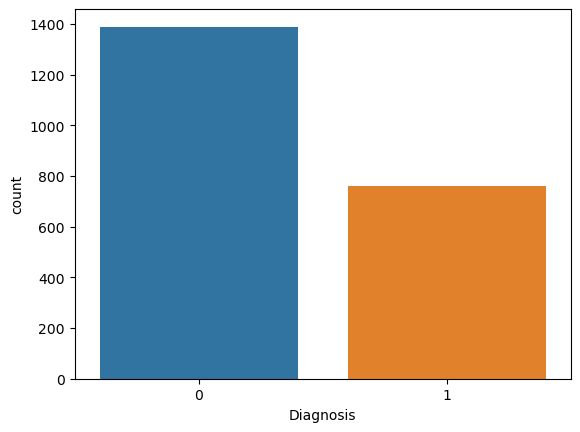

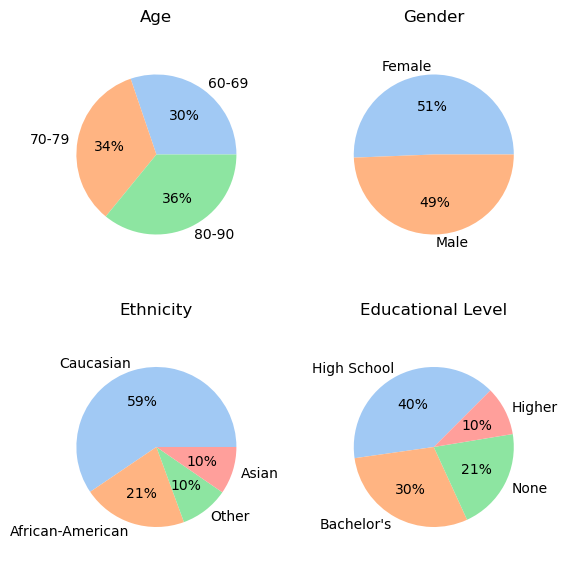

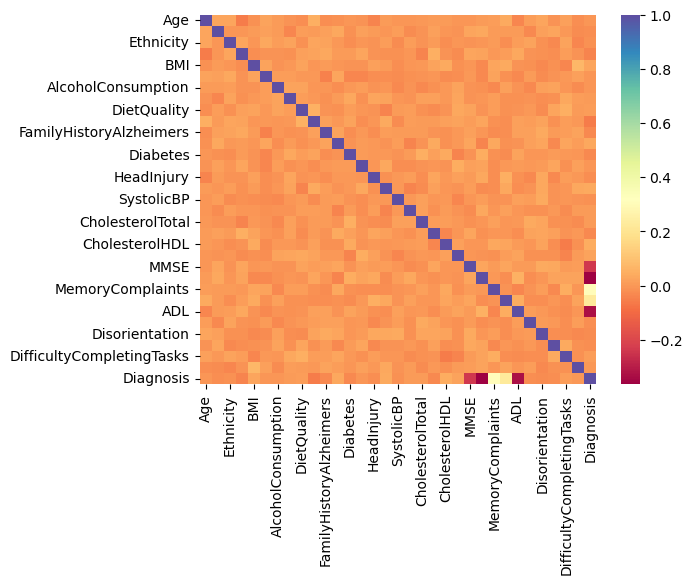

In [ ]:
sns.countplot(data_Alzheimer,x='Diagnosis')


colors = sns.color_palette('pastel')[0:5]


fig, axs = plt.subplots(2, 2, figsize=(6, 6))


data_Alzheimer['bins'] = pd.cut(data_Alzheimer['Age'], bins=[60, 69, 79, 90], labels=["60-69", "70-79", "80-90"])
axs[0, 0].pie(data_Alzheimer.groupby('bins').size(), labels=data_Alzheimer.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 0].set_title("Age")


axs[0, 1].pie(data_Alzheimer['Gender'].value_counts(), labels=['Female', 'Male'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 1].set_title("Gender")


axs[1, 0].pie(data_Alzheimer['Ethnicity'].value_counts(), labels=['Caucasian', 'African-American', 'Other', 'Asian'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 0].set_title("Ethnicity")


axs[1, 1].pie(data_Alzheimer['EducationLevel'].value_counts(), startangle=45, labels=['High School', "Bachelor's", 'None', 'Higher'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Educational Level")


data_Alzheimer.drop(['bins'], axis=1, inplace=True)


plt.tight_layout()
plt.show()


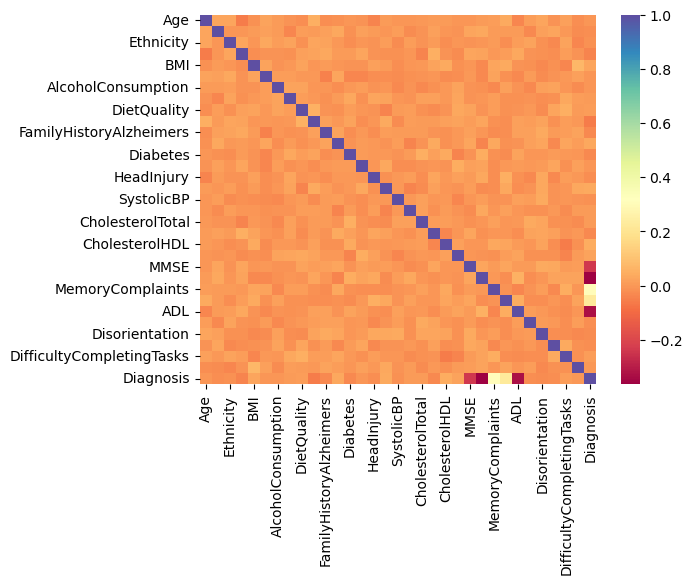

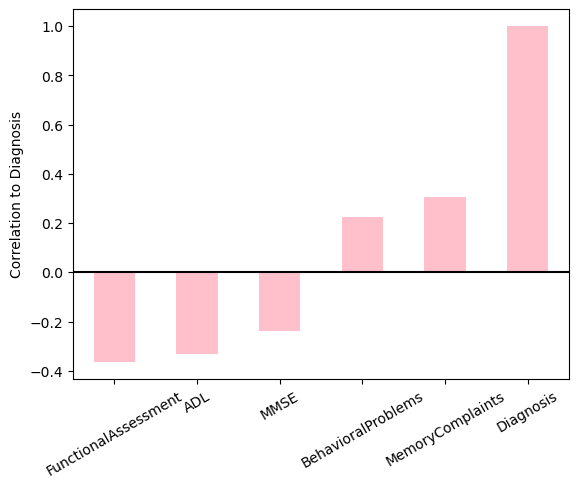

In [7]:
sns.heatmap(data_Alzheimer.corr(),cmap='Spectral')
plt.show()

corr_matrix=data_Alzheimer.corr()['Diagnosis']
heatcol=data_Alzheimer.columns[corr_matrix.abs() > 0.1]
data_Alzheimer[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='pink')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

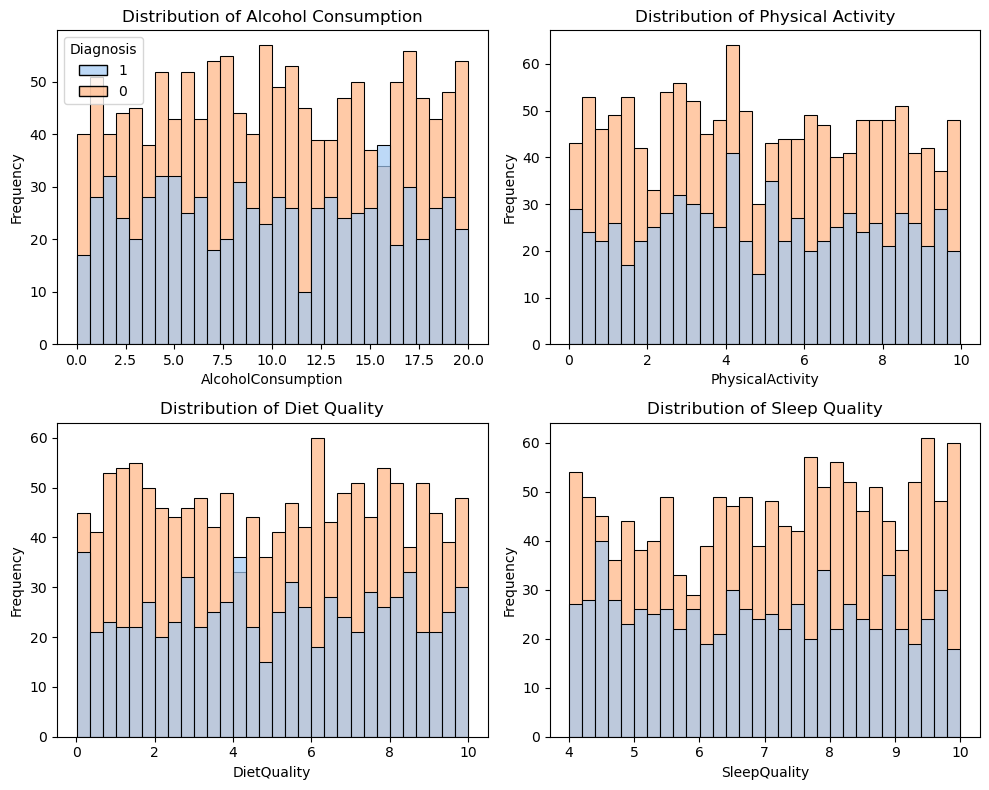

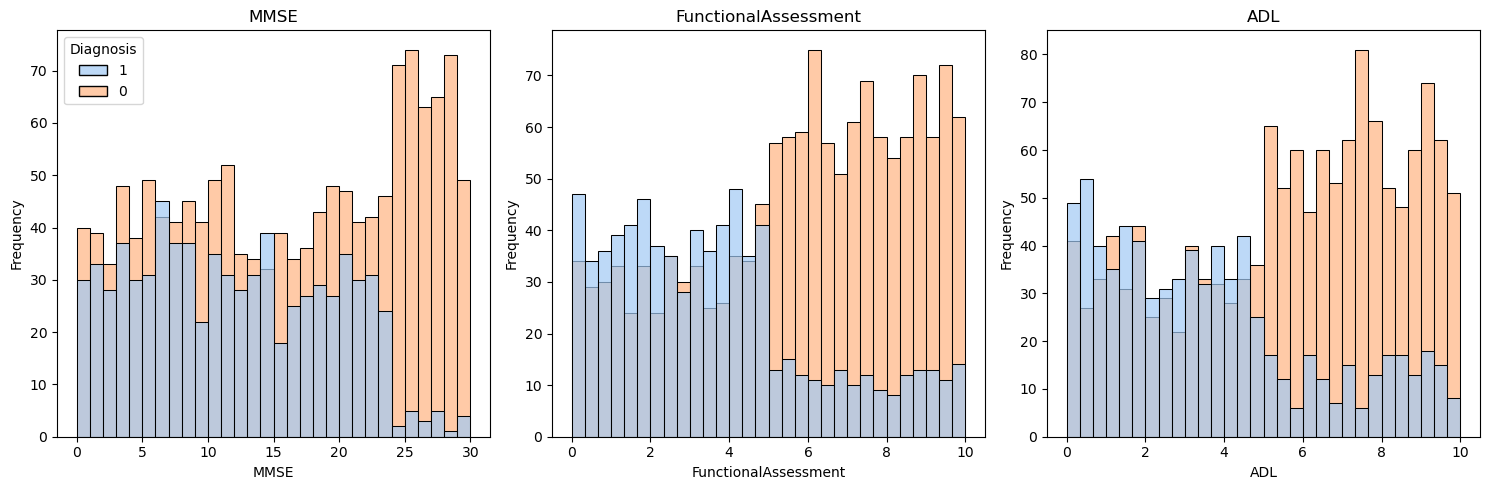

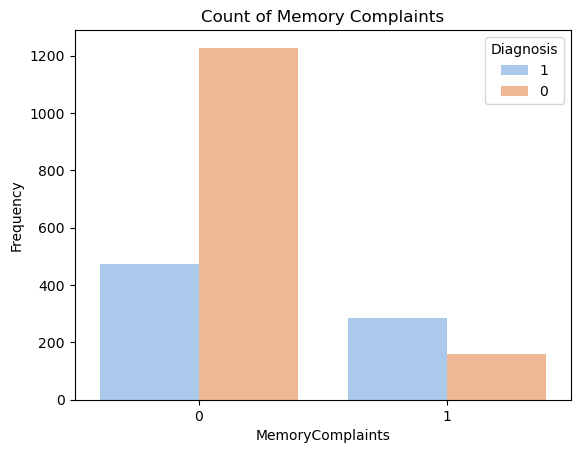

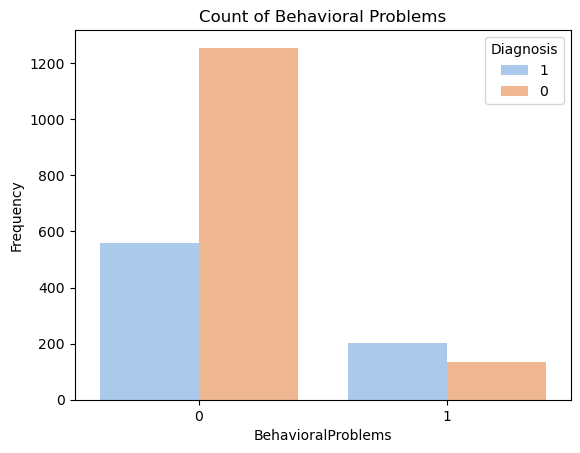

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

hue_order = [1, 0]

sns.histplot(ax=axes[0, 0], x='AlcoholConsumption', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Alcohol Consumption')
axes[0, 0].set_xlabel('AlcoholConsumption')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='PhysicalActivity', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Physical Activity')
axes[0, 1].set_xlabel('PhysicalActivity')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='DietQuality', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Diet Quality')
axes[1, 0].set_xlabel('DietQuality')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='SleepQuality', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Sleep Quality')
axes[1, 1].set_xlabel('SleepQuality')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each histogram with additional features
sns.histplot(ax=axes[0], x='MMSE', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='MMSE')
axes[0].set_xlabel('MMSE')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x='FunctionalAssessment', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='FunctionalAssessment')
axes[1].set_xlabel('FunctionalAssessment')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x='ADL', data=data_Alzheimer, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='ADL')
axes[2].set_xlabel('ADL')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

sns.countplot(x='MemoryComplaints', data=data_Alzheimer, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Memory Complaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='BehavioralProblems', data=data_Alzheimer, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Behavioral Problems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')
plt.show()

In [ ]:
x = data_Alzheimer.drop(columns = ['Diagnosis'])
y = data_Alzheimer['Diagnosis']

rf_accuracy = list()
rf_cv_score = list()
rf_imp = list()

## Running 5 times CV
for i in range(5):
    print('loop: ', i+1)
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(x, y):
        
        ## Splitting the data 
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
        ## Building RF model
        rf_md = RandomForestClassifier(n_estimators = 1000, max_depth = 5).fit(x_train, y_train)
        rf_imp.append(rf_md.feature_importances_)
        rf_pred = rf_md.predict(x_test)
        
        rf_accuracy.append(accuracy_score(y_test, rf_pred))

rf_cv_score = np.mean(rf_accuracy)

print('The accuracy score of the rf model over 5-folds (run 5 times) is:', rf_cv_score)

loop:  1
loop:  2
loop:  3
loop:  4
loop:  5
The accuracy score of the rf model over 5-folds (run 5 times) is: 0.890088361251152


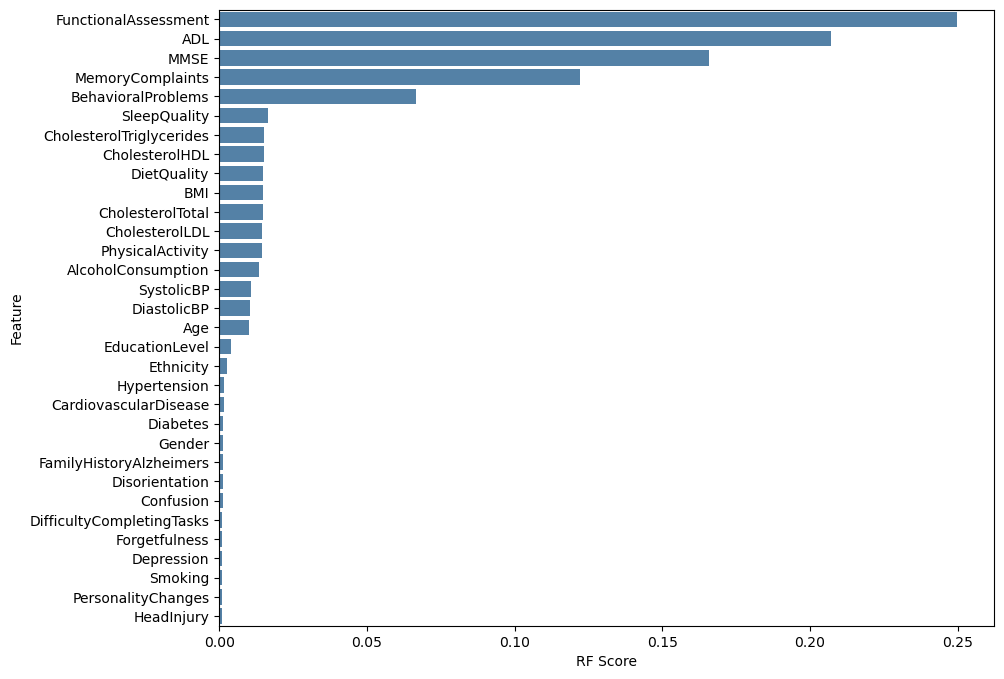

In [9]:
# Plotting importances
dat = pd.DataFrame(pd.DataFrame(rf_imp, columns = x.columns).apply(np.mean, axis = 0))
dat['Feature'] = dat.index
dat.columns = ['RF Score', 'Feature']
dat.reset_index(drop = True, inplace = True)
dat.sort_values(by = 'RF Score', ascending = False, inplace = True)
dat = dat[dat['RF Score'] > 0.00001]

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = dat, x = 'RF Score', y = 'Feature', color = 'steelblue')
plt.show()